Welcome to Luveri, an app supporting couples' love. The appstore link is: https://www.luveri.org/

 

In this small project, I want to explore how users' explorations of the app can affect their life-time value, which should be correponding to how long/how many days they stay in the app. We put the assumption that user has 3 days to explore the features in the app, or 3 days is the duration for the user to explore

In [1]:
# Do some colab mount and import packages
from google.colab import drive
drive.mount('/content/gdrive/')

import sys
sys.path.append('/content/gdrive/My Drive/datahouse')
import os
os.chdir('/content/gdrive/My Drive/datahouse')

import numpy as np

import pandas as pd
import datetime

import dask.dataframe as dd

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


Read files and import data. The data will have 5 columns: the timestamp of the event event_timestamp, the user_id, the feature they use, the total time they spend on that feature, the day they use that feature. 
In addition, we also replace the sub-features into main features, as following.

In the app, there are 10 main features, which are: /WatchPalyerPageRoute, Chat, Gallery, Timeline, CreateMemory, Tink, HomePage, Note, Voice, Map

In [2]:
replace_feat = {
    
    '/WatchPlayerPageRoute/Interstitial':'/WatchPlayerPageRoute' ,
    '/WatchYoutubeBrowser': '/WatchPlayerPageRoute',
    'Watch': '/WatchPlayerPageRoute',
    'WatchBanner/BannerAd/PremiumPage': '/WatchPlayerPageRoute',

    'Chat/Interstitial': 'Chat',
    'ChatMediaView': 'Chat',
    'ChatSearchByDate': 'Chat',
    'ChatSearchByKeyWord': 'Chat',
    'ChatSetting': 'Chat',
    'chat_bubble_capture_screen': 'Chat',
    'chat_bubble_clicked': 'Chat',
    'chat_gif_sent': 'Chat',
    'chat_image_sent': 'Chat',
    'chat_message_sent': 'Chat',
    'chat_on_home_clicked': 'Chat',
    'chat_sticker_clicked': 'Chat',

    'AddAlbum': 'Gallery',
    'EditAlbum': 'Gallery',
    'Gallery/Interstitial': 'Gallery',
    'GalleryAddMedia': 'Gallery',
    'GalleryAddMedia/Interstitial': 'Gallery',
    'GalleryAlbum': 'Gallery',
    'GalleryAlbum/Interstitial': 'Gallery',
    'GalleryCarousel': 'Gallery',
    'GallerySecret': 'Gallery',
    'GallerySecretRegisterDone': 'Gallery',
    'GallerySecretRegisterPassword': 'Gallery',
    'GallerySeeAll': 'Gallery',
    'SingleImageView': 'Gallery',
    'SingleVideoView': 'Gallery',

    'CreateMemory/Chat/Feature/PremiumPage': 'CreateMemory',
    'CreateMemory/ChatInvite/Feature/PremiumPage': 'CreateMemory',
    'CreateMemory/Interstitial': 'CreateMemory',
    'CreateMemory/MediaSource/Feature/PremiumPage': 'CreateMemory',
    'CreateMemory/MediaSource/Feature/PremiumPage/Interstitial': 'CreateMemory',
    'CreateMemory/Menu/Feature/PremiumPage': 'CreateMemory',

    'Home': 'HomePage',
    'HomeBanner/BannerAd/PremiumPage': 'HomePage',
    'HomePanel': 'HomePage',
    'HomePanel/Interstitial': 'HomePage',
    'HomeSetting': 'HomePage',
    'HomeShortCut/PremiumPage': 'HomePage',
    'HomeWidgetLanding': 'HomePage',
    'home_screen_widget_clicked': 'HomePage',
    'home_wallpaper_changed': 'HomePage',
    'home_screen_widget_clicked': 'HomePage',

    'MapBanner/BannerAd/PremiumPage': 'Map',
    'MapSetting': 'Map',

    'NoteEditForm': 'Note',
    'NoteFullPage': 'Note',
    'NotePage': 'Note',
     'note_add_new_note': 'Note',
    'note_with_content_uploaded': 'Note',
    'note_with_cover_uploaded': 'Note',
    'note_with_title_uploaded': 'Note',
    
    'Calendar': 'Timeline', 
    'TimelineEditDateForm': 'Timeline',
    'TimelineNewDateForm': 'Timeline',
    'TimelineSingleDayInfoPage': 'Timeline',
    'TimelineSingleDayInfoPage/Interstitial': 'Timeline',

    'Tink': 'Tink',
    'TinkBanner/BannerAd/PremiumPage': 'Tink',
    'love_message_changed': 'Tink',
 
    'VoiceOnHome/Chat/Feature/PremiumPage': 'Voice',
    'VoiceOnHome/Feature/PremiumPage': 'Voice',
    'VoiceOnHomeList': 'Voice',
    'VoiceOnHomeList/Interstitial': 'Voice',
    'voice_on_home_changed': 'Voice',
    'voice_on_home_play': 'Voice',

}

In [3]:
allfiles0 = os.listdir()
allfiles = []
for i in allfiles0:
  if 'data' in i and i >= 'data20220501' and i <= 'data20220915':
    allfiles.append(i)
allfiles = sorted(allfiles)

features = ['/WatchPlayerPageRoute', 'Chat', 'Gallery', 'CreateMemory', 'HomePage',
            'Map', 'Note', 'Timeline', 'Tink', 'Voice']

dataframelist = []
for i in allfiles:
  consider_df = pd.read_csv(i).replace(replace_feat)
  consider_df = consider_df[~consider_df['user_id'].isnull()]
  consider_df = consider_df[consider_df['used_features'].isin(features + ['WelcomePage'])]
  dataframelist.append(consider_df)

alldata = pd.concat(dataframelist)
alldata.head(5)

,event_timestamp,user_id,used_features,time,date
831,1651354969612000,w7zKjvjR0ZMDNHrdG0caUfbWeEk2,WelcomePage,20623.0,20220501
832,1651345421498000,YXwefJG7JFPtmjDOViuvcHnnl6F2,WelcomePage,NaN,20220501
833,1651345434279001,YXwefJG7JFPtmjDOViuvcHnnl6F2,WelcomePage,12778.0,20220501
834,1651370626499001,o3H0YzbXX9RcTbxuE5Je5G6GBj93,Chat,3508.0,20220501
835,1651370652258012,o3H0YzbXX9RcTbxuE5Je5G6GBj93,Note,4267.0,20220501
...,...,...,...,...,...
455989,1661920625577102,ykfVFe9VqEd90Bh89zTVbgdmN2z1,Timeline,10145.0,20220831
455990,1661956725981005,8HPJuHfzw5OqTjeUxxzfELVbzbu1,Timeline,NaN,20220831
455991,1661956733327009,8HPJuHfzw5OqTjeUxxzfELVbzbu1,Timeline,7345.0,20220831
455992,1661956741728012,8HPJuHfzw5OqTjeUxxzfELVbzbu1,Timeline,NaN,20220831


Our data is now of 4.5 months, from beginning of May to mid of September. For fairness, we remove some new users, as they will create some noise for our data 

In [4]:
# Consider users have started the app at least 1 week ago
# max_days = alldata.groupby('user_id', as_index=False).max()[['user_id', 'date']]
min_days = alldata[alldata['used_features'] == 'WelcomePage'][['user_id', 'date']]

# max_days['date'] = max_days['date'].apply(lambda x: (datetime.date(x//10000, (x%10000)//100, x%100)))
min_days['date'] = min_days['date'].apply(lambda x: (datetime.date(x//10000, (x%10000)//100, x%100)))

current_time = datetime.date(2022, 9, 15)

min_days['days_diff'] = (current_time - min_days['date']).apply(lambda x: x.days)
consider = min_days[min_days['days_diff'] > 7]['user_id'].to_list()
alldata = alldata[alldata['user_id'].isin(consider)]

This part first analyze how users explore the app in their first few days.

In [5]:
alldata = alldata.merge(min_days[['user_id', 'date']], how='inner', on='user_id', suffixes=('', '_first'))
del min_days


In [6]:
alldata['date'] = alldata['date'].apply(lambda x: (datetime.date(x//10000, (x%10000)//100, x%100))) 
alldata['day'] = (alldata['date'] - alldata['date_first'])
alldata = alldata.drop(columns=['date'])

In [7]:
explore = alldata[(alldata['day'] < datetime.timedelta(days=3)) &(alldata['used_features'].isin(features))] # threshold is 3 days
explore.shape

(18074740, 6)

In [8]:
explore0 = explore.groupby(['user_id', 'used_features'], as_index=False).sum()
explore1 = explore.groupby(['user_id', 'used_features'], as_index=False).count()

explore0 = explore0[['user_id', 'used_features', 'time']].merge(explore1[['user_id', 'used_features', 'time']], how='outer', on=['user_id', 'used_features'], suffixes=('', '_count'))
del explore1
explore0.head(5)

,user_id,used_features,time,time_count
0,001nFsWoDcapTAitp7lAUhcT2oZ2,Chat,4526.0,4
1,001nFsWoDcapTAitp7lAUhcT2oZ2,CreateMemory,7262.0,4
2,001nFsWoDcapTAitp7lAUhcT2oZ2,Gallery,3926.0,2
3,001nFsWoDcapTAitp7lAUhcT2oZ2,HomePage,22456.0,8
4,001nFsWoDcapTAitp7lAUhcT2oZ2,Map,22466.0,6


In [9]:
examine = pd.DataFrame()
examine['user_id'] = list(set(explore0['user_id']))
for i in features:
  tmp = explore0[explore0['used_features'] == i]
  examine = examine.merge(tmp[['user_id', 'time', 'time_count']], how='left', on='user_id', suffixes = ('', '_' + i))

del explore0
examine = examine.fillna(0)

In [10]:
examine.head(5)

,user_id,time,time_count,time_Chat,time_count_Chat,time_Gallery,time_count_Gallery,time_CreateMemory,time_count_CreateMemory,time_HomePage,...,time_Map,time_count_Map,time_Note,time_count_Note,time_Timeline,time_count_Timeline,time_Tink,time_count_Tink,time_Voice,time_count_Voice
0,7YeJbYtvO8dbCXvVAVOCUy6s7203,22462.0,9.0,310737.0,60.0,131009.0,28.0,23491.0,4.0,149932.0,...,61278.0,6.0,0.0,0.0,250154.0,37.0,2009.0,1.0,0.0,0.0
1,V4cQo7s3YUfWEnHi1lNAiGiGZFj1,471422.0,22.0,215152.0,52.0,57178.0,16.0,115224.0,8.0,211730.0,...,131598.0,28.0,0.0,0.0,48764.0,12.0,4006.0,2.0,0.0,0.0
2,Eh1vAmoTEydpiXbnQn4dZ3l4Fft1,49380.0,14.0,629218.0,84.0,18974.0,6.0,0.0,0.0,133460.0,...,343570.0,32.0,0.0,0.0,26658.0,6.0,4006.0,2.0,0.0,0.0
3,v4OZ83S9KnNOfPksM8CGhlaOVVr1,15605.0,3.0,762672.0,117.0,56342.0,7.0,67712.0,5.0,207601.0,...,227566.0,21.0,0.0,0.0,16965.0,6.0,8011.0,5.0,0.0,0.0
4,CypLe3JAHeRTMcWMupJJmH7R1PO2,275716.0,24.0,108371.0,36.0,117181.0,15.0,0.0,0.0,55061.0,...,103817.0,4.0,0.0,0.0,18973.0,10.0,2003.0,1.0,6476.0,5.0


Get number of days users stay in the app up to current day

In [11]:
del tmp
tmp = alldata.groupby(['user_id'], as_index=False).max()[['user_id', 'day']]
examine = examine.merge(tmp, how='left', on='user_id')


In [18]:
examine2 = examine.rename(columns = {'time': 'time_/WatchPlayerPageRoute', 'time_count': 'time_count_/WatchPlayerPageRoute'})
examine2['day'] = examine2['day'].apply(lambda x: x.days)

In [19]:
examine2.head(5)

,user_id,time_/WatchPlayerPageRoute,time_count_/WatchPlayerPageRoute,time_Chat,time_count_Chat,time_Gallery,time_count_Gallery,time_CreateMemory,time_count_CreateMemory,time_HomePage,...,time_count_Map,time_Note,time_count_Note,time_Timeline,time_count_Timeline,time_Tink,time_count_Tink,time_Voice,time_count_Voice,day
0,7YeJbYtvO8dbCXvVAVOCUy6s7203,22462.0,9.0,310737.0,60.0,131009.0,28.0,23491.0,4.0,149932.0,...,6.0,0.0,0.0,250154.0,37.0,2009.0,1.0,0.0,0.0,0
1,V4cQo7s3YUfWEnHi1lNAiGiGZFj1,471422.0,22.0,215152.0,52.0,57178.0,16.0,115224.0,8.0,211730.0,...,28.0,0.0,0.0,48764.0,12.0,4006.0,2.0,0.0,0.0,27
2,Eh1vAmoTEydpiXbnQn4dZ3l4Fft1,49380.0,14.0,629218.0,84.0,18974.0,6.0,0.0,0.0,133460.0,...,32.0,0.0,0.0,26658.0,6.0,4006.0,2.0,0.0,0.0,12
3,v4OZ83S9KnNOfPksM8CGhlaOVVr1,15605.0,3.0,762672.0,117.0,56342.0,7.0,67712.0,5.0,207601.0,...,21.0,0.0,0.0,16965.0,6.0,8011.0,5.0,0.0,0.0,18
4,CypLe3JAHeRTMcWMupJJmH7R1PO2,275716.0,24.0,108371.0,36.0,117181.0,15.0,0.0,0.0,55061.0,...,4.0,0.0,0.0,18973.0,10.0,2003.0,1.0,6476.0,5.0,0


Visualize. First, we plot the targeted data from above columns

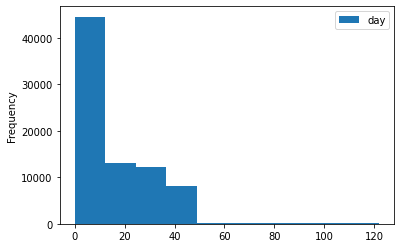

In [20]:
examine2.plot(y = 'day', kind='hist')
# There is some thing happening in range 40s. Let's explore why

In [39]:
tmp = alldata.groupby(['user_id', 'date_first'], as_index=False).min()[['user_id', 'date_first']].groupby(['date_first'], as_index=False).count()
tmp.nlargest(5, 'user_id')

,date_first,user_id
83,2022-07-23,17453
77,2022-07-17,13478
84,2022-07-24,5356
82,2022-07-22,5184
78,2022-07-18,3993


Ah, it turns out about 40 days ago, there is a huge wave of users, this creates a threshold in the max_days used by the users

Now, let's plot if the features are discovered by the user, how many more days they will spend on the app comparing to not discovering the features

In [40]:
import seaborn as sns
for i in features:
  examine2['usage_' + i ] = examine2['time_count_' + i].apply(lambda x: 0 if x == 0 else 1)
examine2.head(5)

,user_id,time_/WatchPlayerPageRoute,time_count_/WatchPlayerPageRoute,time_Chat,time_count_Chat,time_Gallery,time_count_Gallery,time_CreateMemory,time_count_CreateMemory,time_HomePage,...,usage_Chat,usage_Gallery,usage_CreateMemory,usage_HomePage,usage_Map,usage_Note,usage_Timeline,usage_Tink,usage_Voice,category
0,7YeJbYtvO8dbCXvVAVOCUy6s7203,22462.0,9.0,310737.0,60.0,131009.0,28.0,23491.0,4.0,149932.0,...,1,1,1,1,1,0,1,1,0,0
1,V4cQo7s3YUfWEnHi1lNAiGiGZFj1,471422.0,22.0,215152.0,52.0,57178.0,16.0,115224.0,8.0,211730.0,...,1,1,1,1,1,0,1,1,0,0
2,Eh1vAmoTEydpiXbnQn4dZ3l4Fft1,49380.0,14.0,629218.0,84.0,18974.0,6.0,0.0,0.0,133460.0,...,1,1,0,1,1,0,1,1,0,0
3,v4OZ83S9KnNOfPksM8CGhlaOVVr1,15605.0,3.0,762672.0,117.0,56342.0,7.0,67712.0,5.0,207601.0,...,1,1,1,1,1,0,1,1,0,0
4,CypLe3JAHeRTMcWMupJJmH7R1PO2,275716.0,24.0,108371.0,36.0,117181.0,15.0,0.0,0.0,55061.0,...,1,1,0,1,1,0,1,1,1,>=103992.40000000005


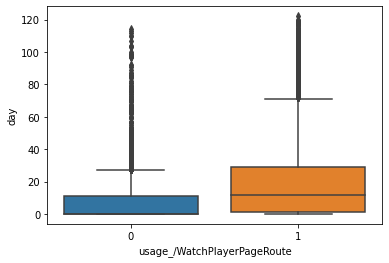

In [41]:
sns.boxplot(x = examine2['usage_/WatchPlayerPageRoute'], y= examine2['day'])

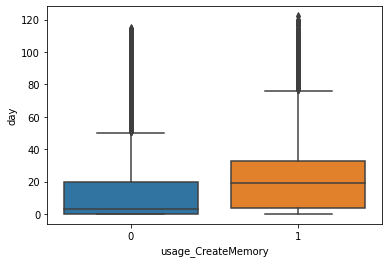

In [42]:
sns.boxplot(x = examine2['usage_CreateMemory'], y= examine2['day'])

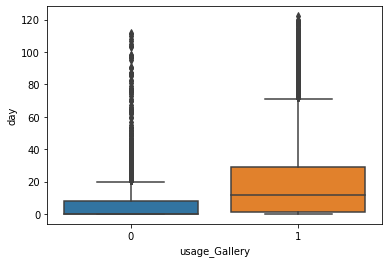

In [43]:
sns.boxplot(x = examine2['usage_Gallery'], y= examine2['day'])

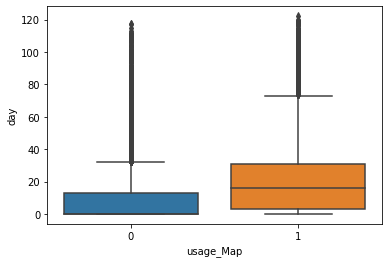

In [45]:
sns.boxplot(x = examine2['usage_Map'], y= examine2['day'])

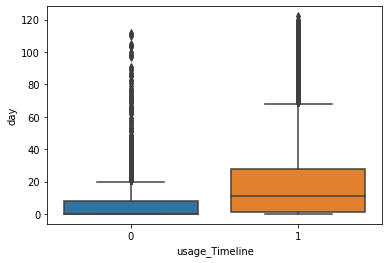

In [46]:
sns.boxplot(x = examine2['usage_Timeline'], y= examine2['day'])

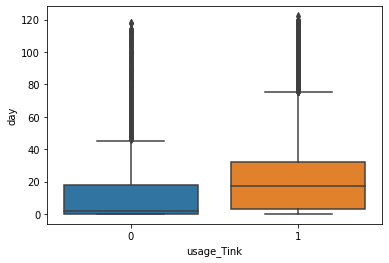

In [47]:
sns.boxplot(x = examine2['usage_Tink'], y= examine2['day'])

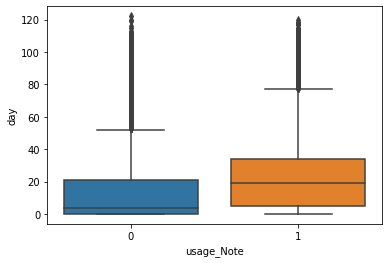

In [48]:
sns.boxplot(x = examine2['usage_Note'], y= examine2['day'])

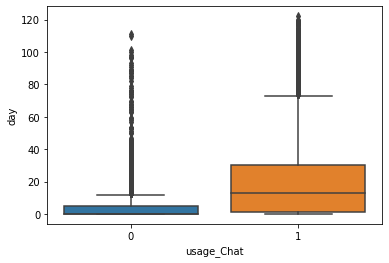

In [49]:
sns.boxplot(x = examine2['usage_Chat'], y= examine2['day'])

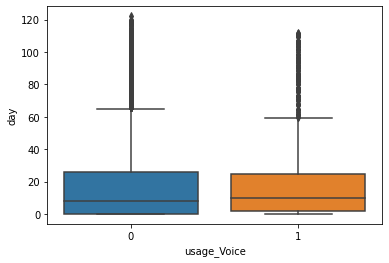

In [50]:
sns.boxplot(x = examine2['usage_Voice'], y= examine2['day'])

We see that most features discovered all have signifcant increment in users staying in the app. Only Voice feature is having some trouble in keeping the users 

Now, let's see how the days they stick with the app correlated with how much time they spend on exploring the features. We consider 2 things for each feature: count for the number of interactions user has with the feature, and time is the total time user spend in the feature

In [73]:
def bar_continous_plot(df, feature, day):
  df['category'] = [0]*df.shape[0]
  for i in range(0, 7):
    thresh1 = df[feature].quantile(i * 0.1)
    thresh2 = df[feature].quantile((i+1) * 0.1)
    df.loc[(df[feature] >=thresh1) & (df[feature]< thresh2) ,'category']  = thresh1
  
  return df.groupby(['category'], as_index=False).mean()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


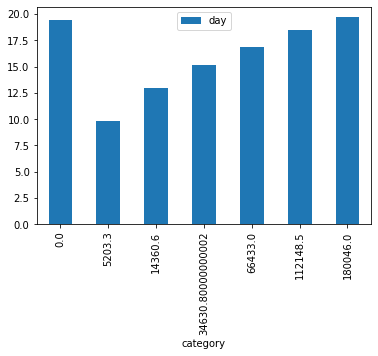

In [76]:
xd = examine2[examine2['usage_Chat'] ==1]
bar_continous_plot(xd, 'time_Chat', 'day').sort_values(by='category').plot.bar(x='category', y=['day'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


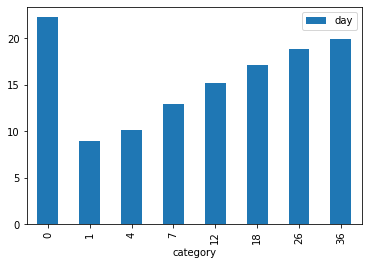

In [77]:
xd = examine2[examine2['usage_Chat'] ==1]
bar_continous_plot(xd, 'time_count_Chat', 'day').sort_values(by='category').plot.bar(x='category', y=['day'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


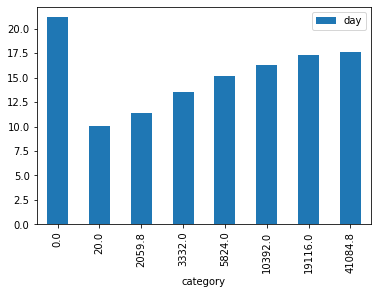

In [78]:
xd = examine2[examine2['usage_/WatchPlayerPageRoute'] ==1]
bar_continous_plot(xd, 'time_/WatchPlayerPageRoute', 'day').sort_values(by='category').plot.bar(x='category', y=['day'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


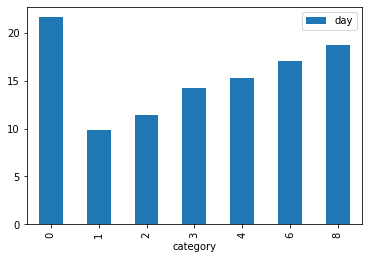

In [79]:
xd = examine2[examine2['usage_/WatchPlayerPageRoute'] ==1]
bar_continous_plot(xd, 'time_count_/WatchPlayerPageRoute', 'day').sort_values(by='category').plot.bar(x='category', y=['day'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


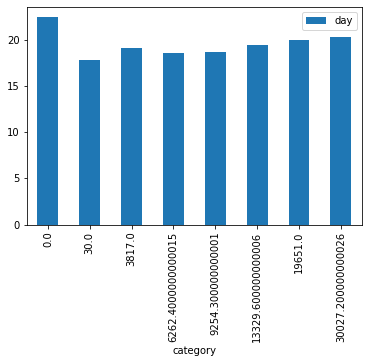

In [80]:
xd = examine2[examine2['usage_CreateMemory'] ==1]
bar_continous_plot(xd, 'time_CreateMemory', 'day').sort_values(by='category').plot.bar(x='category', y=['day'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


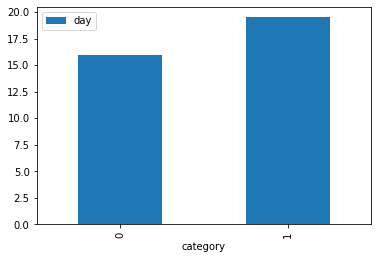

In [85]:
bar_continous_plot(xd, 'time_count_CreateMemory', 'day').sort_values(by='category').plot.bar(x='category', y=['day'])

This feature, CreateMemory, seems to have only very few explorations and interactions (only 2 columns). It seems that users do not explore this feature enough, making the feature having no effect on longterm duration. This feature should be re-designed

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


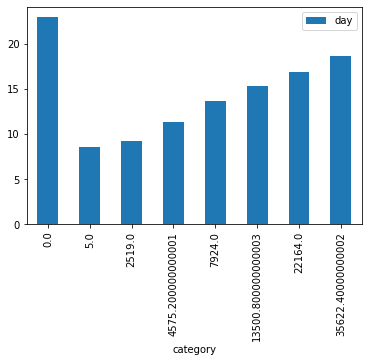

In [86]:
xd = examine2[examine2['usage_Gallery'] ==1]
bar_continous_plot(xd, 'time_Gallery', 'day').sort_values(by='category').plot.bar(x='category', y=['day'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


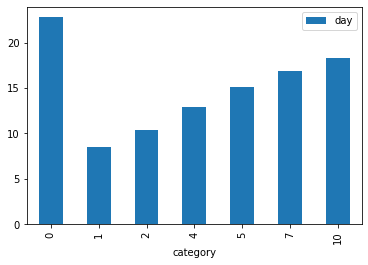

In [87]:
bar_continous_plot(xd, 'time_count_Gallery', 'day').sort_values(by='category').plot.bar(x='category', y=['day'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


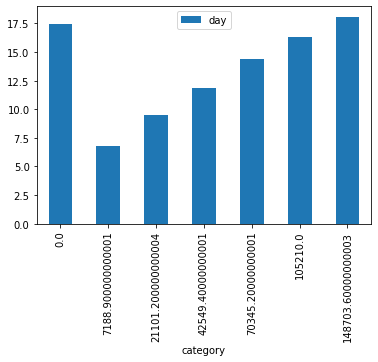

In [88]:
xd = examine2[examine2['usage_HomePage'] ==1]
bar_continous_plot(xd, 'time_HomePage', 'day').sort_values(by='category').plot.bar(x='category', y=['day'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


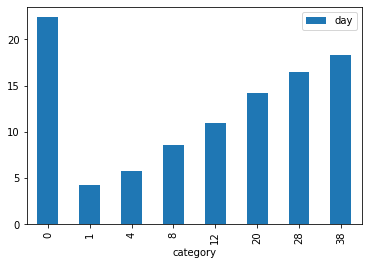

In [90]:
bar_continous_plot(xd, 'time_count_HomePage', 'day').plot.bar(x='category', y=['day'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


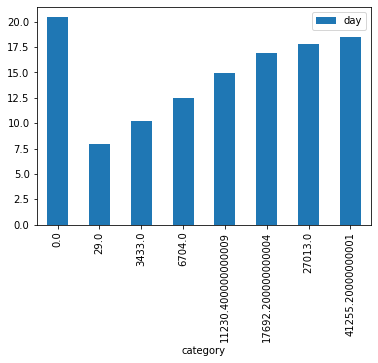

In [91]:
xd = examine2[examine2['usage_Timeline'] ==1]
bar_continous_plot(xd, 'time_Timeline', 'day').sort_values(by='category').plot.bar(x='category', y=['day'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


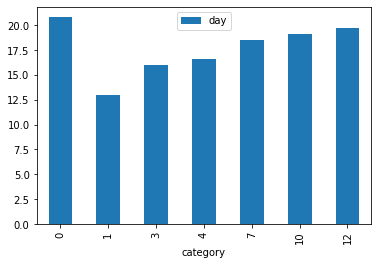

In [96]:
bar_continous_plot(xd, 'time_count_Timeline', 'day').plot.bar(x='category', y=['day'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


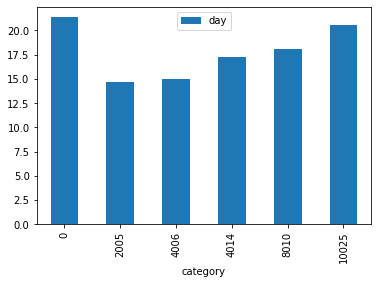

In [93]:
xd = examine2[examine2['usage_Tink'] ==1]
bar_continous_plot(xd, 'time_Tink', 'day').sort_values(by='category').plot.bar(x='category', y=['day'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


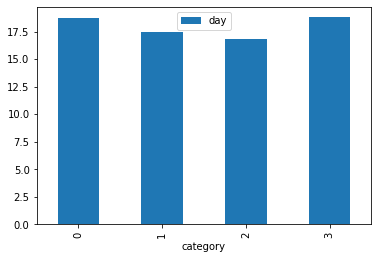

In [97]:
bar_continous_plot(xd, 'time_count_Tink', 'day').plot.bar(x='category', y=['day'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


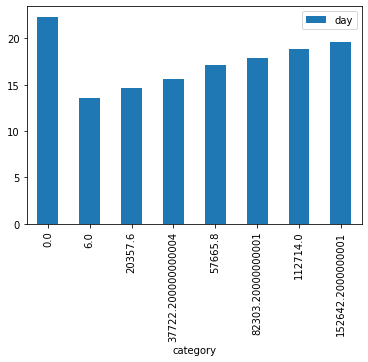

In [98]:
xd = examine2[examine2['usage_Map'] ==1]
bar_continous_plot(xd, 'time_Map', 'day').sort_values(by='category').plot.bar(x='category', y=['day'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


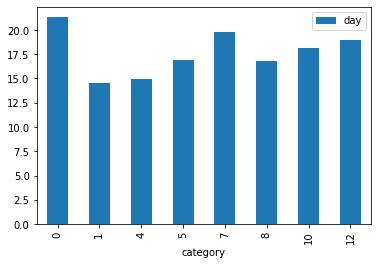

In [99]:
bar_continous_plot(xd, 'time_count_Map', 'day').plot.bar(x='category', y=['day'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


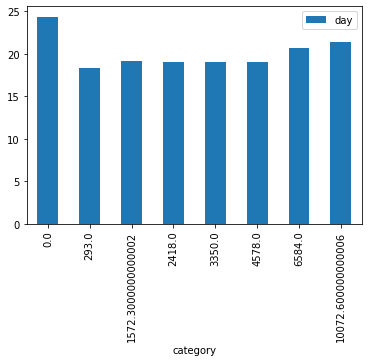

In [100]:
xd = examine2[examine2['usage_Note'] ==1]
bar_continous_plot(xd, 'time_Note', 'day').sort_values(by='category').plot.bar(x='category', y=['day'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


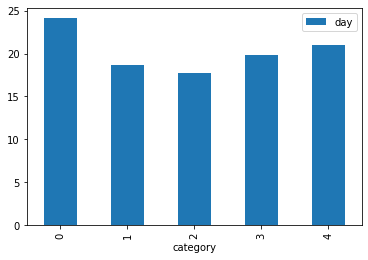

In [102]:
bar_continous_plot(xd, 'time_count_Note', 'day').plot.bar(x='category', y=['day'])

This feature, Note, does not experience similar graph as the other features. It seems that the exploration of this features does not significantly increase the duration of staying. The feature should be re-designed.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


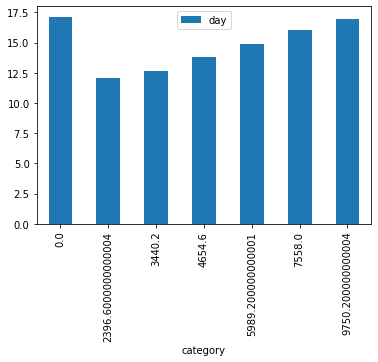

In [104]:
xd = examine2[examine2['usage_Voice'] ==1]
bar_continous_plot(xd, 'time_Voice', 'day').sort_values(by='category').plot.bar(x='category', y=['day'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


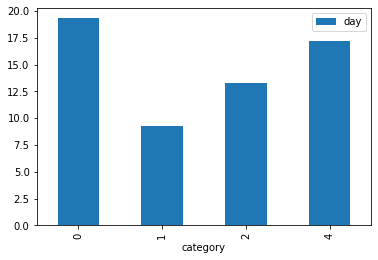

In [105]:
bar_continous_plot(xd, 'time_count_Voice', 'day').plot.bar(x='category', y=['day'])

Overall, we see a trend in all the features, which is a high number of users with nearly 0 usage of the features, yet still achieve long duration of staying in the app. This phenomenon can be due to other features, or some factors the visualizations have not discovered. Then, the duration of staying in the app increases as the exploration increases in both times and interactions, except a few cases, which are explained above.



